In [4]:
# using Pkg
# Pkg.add("Clustering");
# Pkg.add("RDatasets");

In [8]:
using Clustering # for clustering
using RDatasets # for getting samples datasets
using Plots # for plotting

In [7]:
# get some sample data
df = dataset("cluster","xclara")

Row,V1,V2
,Float64,Float64
1,2.07234,-3.24169
2,17.9367,15.7848
3,1.08358,7.31918
4,11.1207,14.4068
5,23.7115,2.55773
6,24.1699,32.0248
7,21.6658,4.89285
8,4.69368,12.3422
9,19.2119,-1.12137


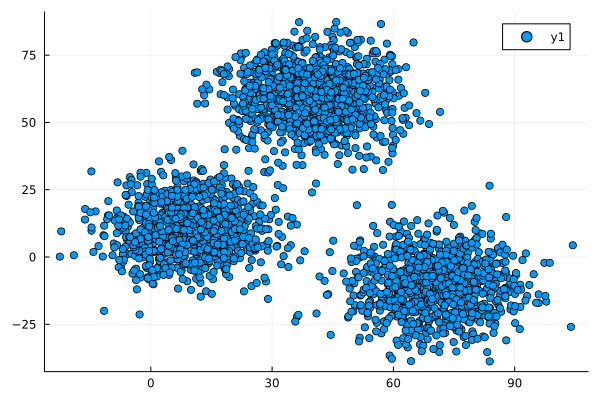

In [9]:
scatter(df.V1, df.V2)

In [25]:
features = collect(Matrix(df)'); # features to use for clustering | convert is not working

2×3000 Matrix{Float64}:
  2.07234  17.9367  1.08358  11.1207  …   64.4653   90.7228   64.8798
 -3.24169  15.7848  7.31918  14.4068     -10.5014  -12.2558  -24.8773

In [26]:
# cluster X into 20 clusters using K-means
model = kmeans(features, 3; maxiter=200, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.158312e+06
      1       6.119344e+05      -5.463775e+05 |        3
      2       6.116076e+05      -3.267420e+02 |        2
      3       6.116059e+05      -1.728735e+00 |        0
      4       6.116059e+05       0.000000e+00 |        0
K-means converged with 4 iterations (objv = 611605.8806933899)


KmeansResult{Matrix{Float64}, Float64, Int64}([40.68362784160133 9.478045899766407 69.92418447478987; 59.715892741514416 10.686052004816457 -10.119641194361344], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [248.82648673599076, 97.54633145402863, 81.80297892989307, 16.542030748810703, 268.662273841995, 671.1927708671267, 182.10199403461115, 25.632845601907206, 234.1632302622802, 256.38180079050915  …  466.72939280326045, 9.368284820777262, 133.564288058049, 226.74875462945602, 262.74319403555455, 260.77455537845526, 225.04340330959894, 29.944910600701405, 437.14658504774525, 243.23500685878025], [1149, 899, 952], [1149, 899, 952], 611605.8806933899, 4, true)

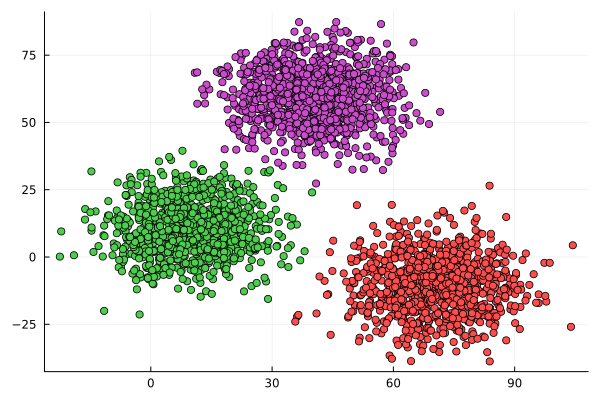

In [27]:
# plot with the point color mapped to the assigned cluster index
scatter(df.V1, df.V2, marker_z=model.assignments,
        color=:lightrainbow, legend=false)

In [29]:
df.clusters = model.assignments;

In [30]:
first(df, 10)

Row,V1,V2,clusters
,Float64,Float64,Int64
1,2.07234,-3.24169,2
2,17.9367,15.7848,2
3,1.08358,7.31918,2
4,11.1207,14.4068,2
5,23.7115,2.55773,2
6,24.1699,32.0248,2
7,21.6658,4.89285,2
8,4.69368,12.3422,2
9,19.2119,-1.12137,2


In [31]:
nclusters(model) # get number of clusters

3

In [32]:
counts(model) # number of points in each cluster

3-element Vector{Int64}:
 1149
  899
  952